# Titanic Prediction with Decision-Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

## ***i cleaned data before and i saved the results so i just use cleaned datasets***

In [2]:
df = pd.read_csv('final-df.csv')
test_df = pd.read_csv('final-test-df.csv')

In [3]:
df.head(2)

,Unnamed: 0,Sex_male,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,1,0,3,22.0,1,0,7.2500
1,1,0,0,0,1,1,38.0,1,0,71.2833


In [4]:
test_df.head(2)

,Unnamed: 0,Sex_male,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,0,892,3,34.5,0,0,7.8292
1,1,0,0,1,893,3,47.0,1,0,7.0000


In [6]:
df = df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

In [7]:
df.shape, test_df.shape

((889, 9), (418, 9))

### creating X  and y

In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Scaling

In [10]:
X = StandardScaler().fit_transform(X)

In [11]:
X[:3]

array([[ 0.73534203, -0.30794088,  0.61679395,  0.82520863, -0.59049493,
         0.43135024, -0.47432585, -0.50023975],
       [-1.35991138, -0.30794088, -1.62128697, -1.57221121,  0.64397101,
         0.43135024, -0.47432585,  0.78894661],
       [-1.35991138, -0.30794088,  0.61679395,  0.82520863, -0.28187844,
        -0.47519908, -0.47432585, -0.48664993]])

### train-test split

In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=42)

## initial model

In [15]:
model = DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report

## creating a function to train and evaluate models

In [22]:
def evaluator(model):
    model.fit(train_x, train_y)
    yhat_train = model.predict(train_x)
    yhat = model.predict(test_x)
    print('accuary score is %f' % accuracy_score(test_y, yhat))
    print(classification_report(test_y, yhat))
    plot_confusion_matrix(model, test_x, test_y)
    plot_precision_recall_curve(model, test_x, test_y)
    plot_roc_curve(model, test_x, test_y)

accuary score is 0.758427
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       109
           1       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



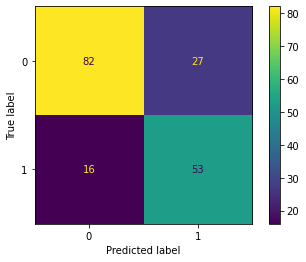

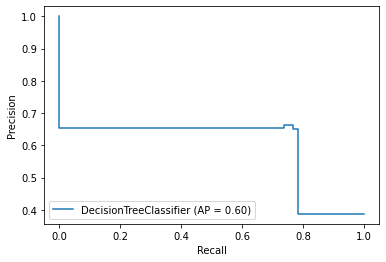

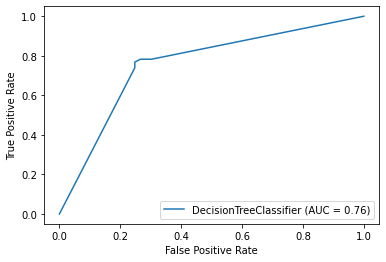

In [23]:
evaluator(model)

## using GridSearchCV to reach better solutions

In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {'criterion':['gini', 'entropy'], 'max_depth':[4, 8, 10, 15, 20], 'max_leaf_nodes':[4, 8, 10, 15, 20]}

In [28]:
grid_model = GridSearchCV(model, params, cv=5, scoring='accuracy')

accuary score is 0.797753
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.76      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



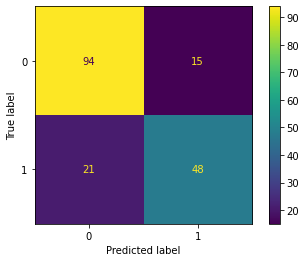

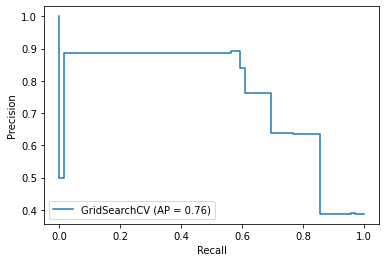

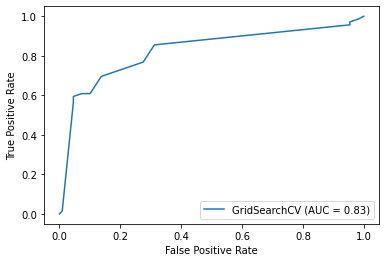

In [29]:
evaluator(grid_model)

In [33]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

In [34]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 20}

In [35]:
grid_model.best_score_

0.8298039988180834

In [30]:
from sklearn.tree import plot_tree

## final model

In [36]:
final_model = DecisionTreeClassifier(criterion='gini', max_depth=10, max_leaf_nodes=20).fit(train_x, train_y)

## ***plotting tree***

[Text(773.3152173913044, 1540.2, 'Sex_male <= -0.312\ngini = 0.472\nsamples = 711\nvalue = [440, 271]'),
 Text(454.89130434782606, 1359.0, 'PassengerId <= 0.226\ngini = 0.38\nsamples = 239\nvalue = [61, 178]'),
 Text(382.1086956521739, 1177.8, 'gini = 0.076\nsamples = 126\nvalue = [5, 121]'),
 Text(527.6739130434783, 1177.8, 'Parch <= -0.176\ngini = 0.5\nsamples = 113\nvalue = [56, 57]'),
 Text(327.52173913043475, 996.6, 'Embarked_S <= -0.502\ngini = 0.475\nsamples = 90\nvalue = [35, 55]'),
 Text(145.56521739130434, 815.4, 'Pclass <= 0.034\ngini = 0.381\nsamples = 43\nvalue = [11, 32]'),
 Text(72.78260869565217, 634.2, 'gini = 0.343\nsamples = 41\nvalue = [9, 32]'),
 Text(218.3478260869565, 634.2, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(509.4782608695652, 815.4, 'Parch <= -0.49\ngini = 0.5\nsamples = 47\nvalue = [24, 23]'),
 Text(363.9130434782609, 634.2, 'Pclass <= -0.255\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(291.1304347826087, 453.0, 'gini = 0.0\nsamples = 5\n

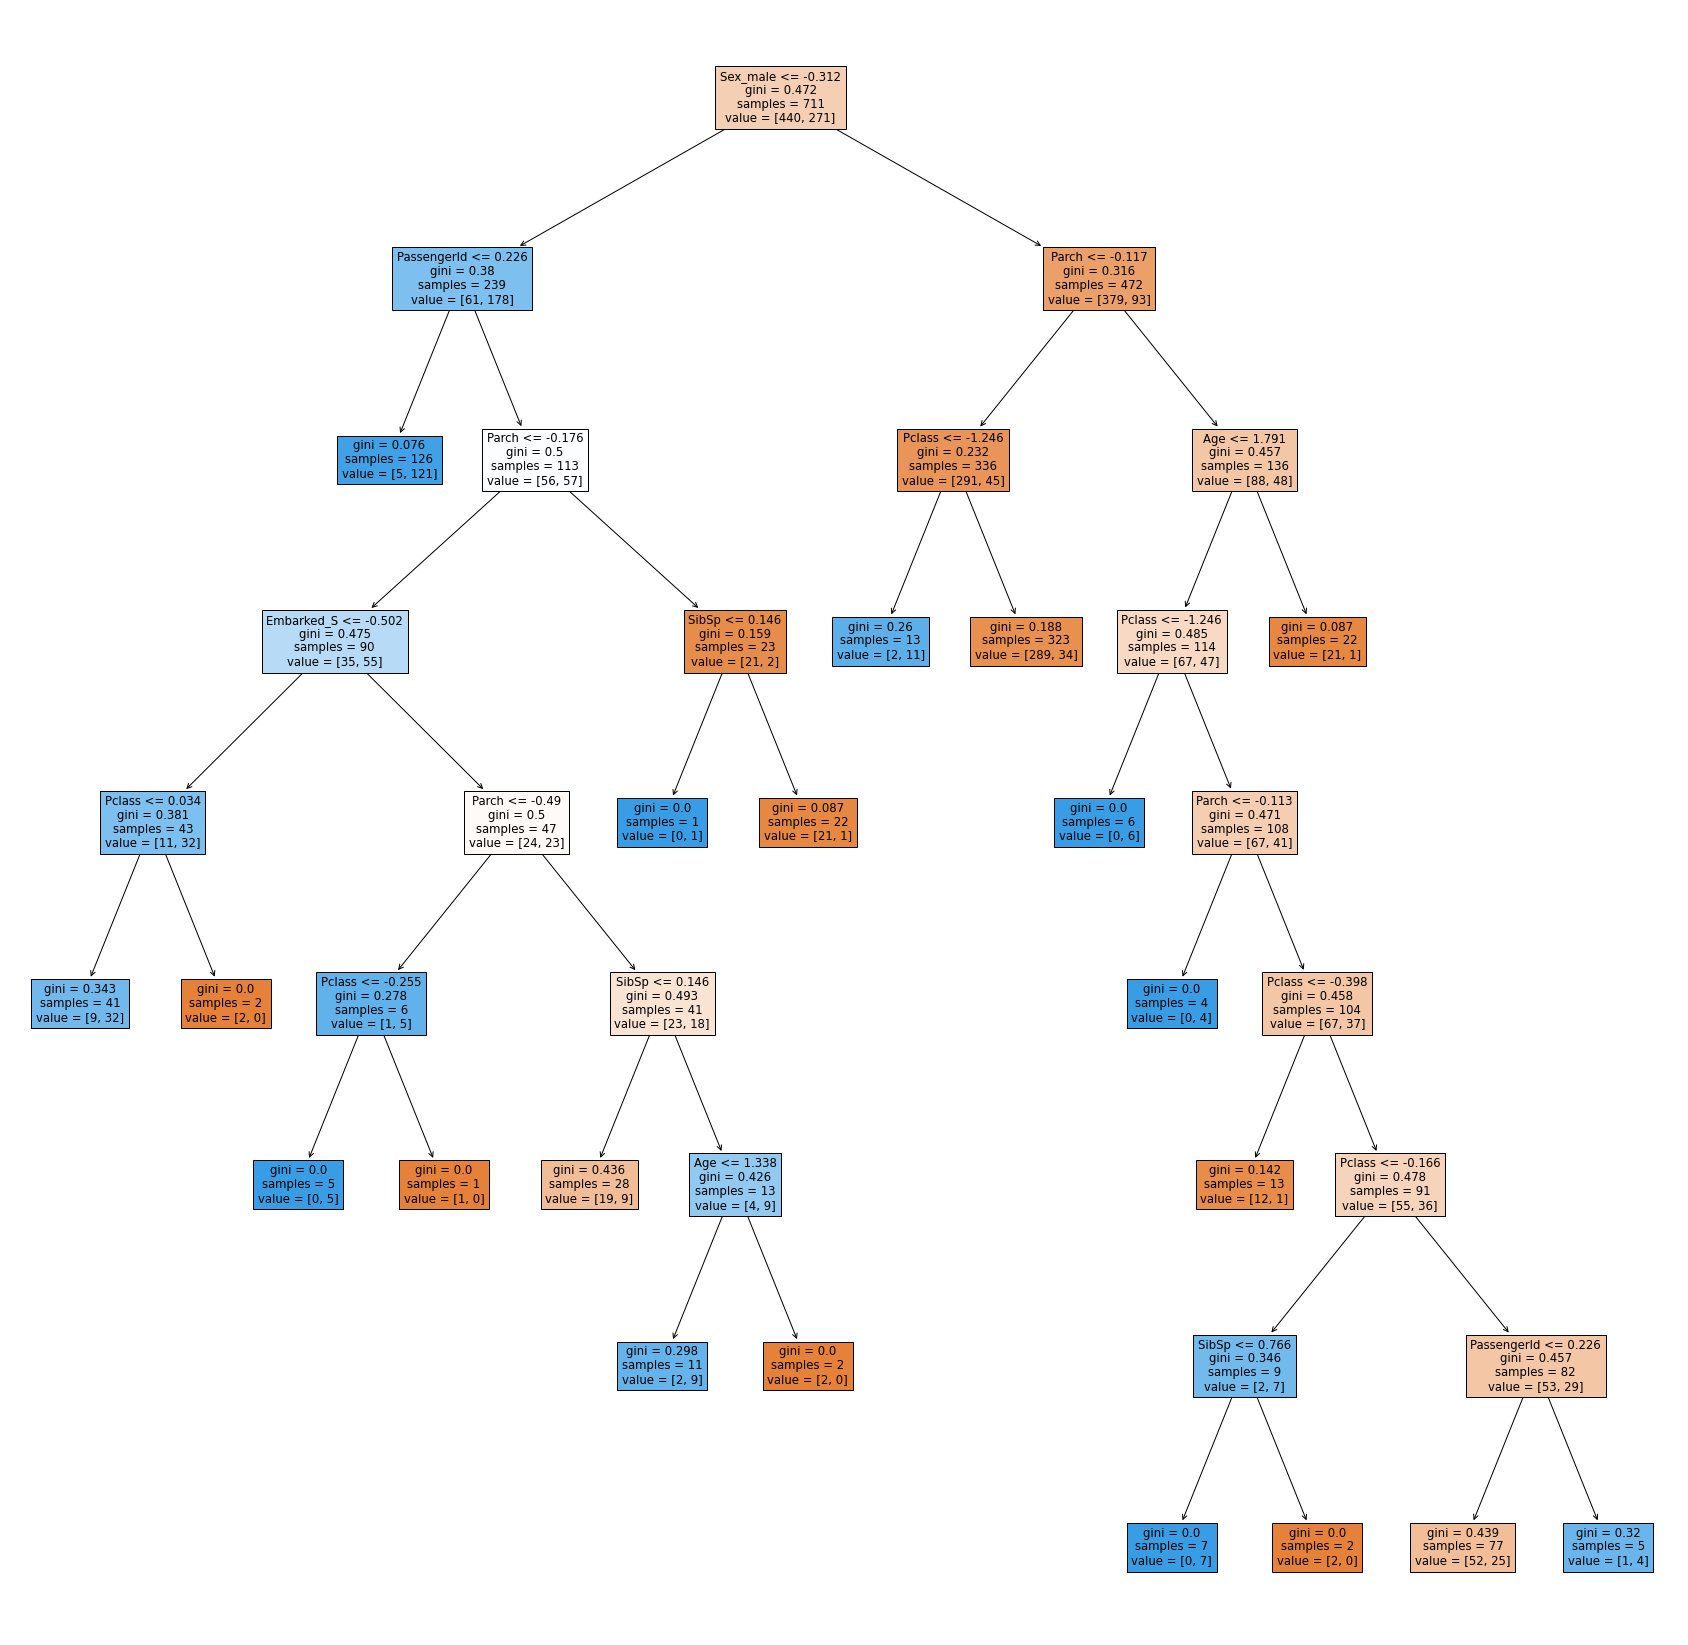

In [39]:
plt.figure(figsize=(30, 30))
plot_tree(final_model, filled=True, feature_names=test_df.columns)